Write a simple Python code to model the Frozen Lake (FL) environment using Python 
Dictionary data structure and design an RL agent training using the Temporal Difference 
method. 

In a 4x4 grid and holes at (2,2);(2,4);(3,4) and (4,1)



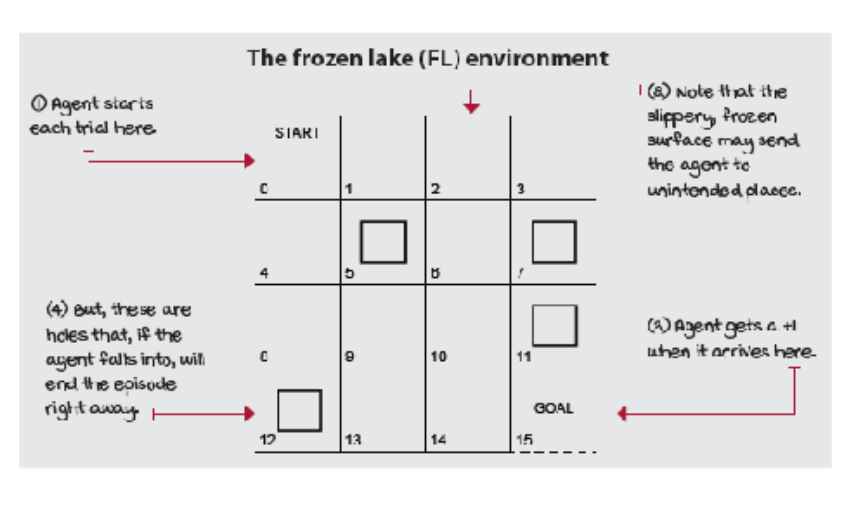

In [5]:
import numpy as np

# Define the Frozen Lake environment
lake = {
    'state_space': 16,
    'action_space': 4,
    'start': 0,
    'goal': 15,
    'holes': [(2, 2), (2, 4), (3, 4), (4, 1)],
    'transitions': {},  # To be filled with state transitions and rewards
}

# Initialize state transitions and rewards
for state in range(lake['state_space']):
    lake['transitions'][state] = {}
    for action in range(lake['action_space']):
        next_state = state  # Default to same state (no movement)
        reward = 0
        # Define movements and check for holes/goal
        if action == 0 and state % 4 > 0:  # Left
            next_state = state - 1
        elif action == 1 and state % 4 < 3:  # Right
            next_state = state + 1
        elif action == 2 and state // 4 > 0:  # Up
            next_state = state - 4
        elif action == 3 and state // 4 < 3:  # Down
            next_state = state + 4
        
        # Check for holes and goal
        if (next_state // 4 + 1, next_state % 4 + 1) in lake['holes']:
            reward = -1  # Penalty for falling into a hole
        elif next_state == lake['goal']:
            reward = 1  # Reward for reaching the goal
        
        lake['transitions'][state][action] = (next_state, reward)

# Define the RL agent
class TDAgent:
    def __init__(self, env):
        self.env = env
        self.Q = np.zeros((env['state_space'], env['action_space']))
        self.alpha = 0.1  # Learning rate
        self.gamma = 0.9  # Discount factor
    
    def choose_action(self, state):
        return np.argmax(self.Q[state])
    
    def update(self, state, action, reward, next_state):
        best_next_action = self.choose_action(next_state)
        td_target = reward + self.gamma * self.Q[next_state][best_next_action]
        td_error = td_target - self.Q[state][action]
        self.Q[state][action] += self.alpha * td_error

# Train the agent
agent = TDAgent(lake)
episodes = 100
for _ in range(episodes):
    state = lake['start']
    while state != lake['goal']:
        action = agent.choose_action(state)
        next_state, reward = lake['transitions'][state][action]
        agent.update(state, action, reward, next_state)
        state = next_state

# Display the learned Q-values
print(agent.Q)


KeyboardInterrupt: 